# Machine Learning Modeling

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import itertools
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('wishful_thinking.csv')

In [3]:
df.head()

,Unnamed: 0,event,begin,max,end,obs,q,type,loc,freq,...,date,yes_no,duration,del_begin_max,del_end_max,closer_begin_end,flare_event,last_event_time,t_since_last_event,datetime
0,0,2310,00:07:00,1900-01-01 00:13:00,1900-01-01 00:20:00,GO8,5,1,1-8A,C1.2,...,2001-01-01 00:00:00,1.0,13,6,7.0,0.0,0,2001-01-01 00:07:00,0 days 00:00:00.000000000,978336420.0
1,1,2470,00:46:00,NaN,1900-01-01 00:46:00,CUL,C,2,40-100,III/1,...,2001-01-01 00:00:00,1.0,0,0,0.0,0.0,0,2001-01-01 00:46:00,0 days 00:00:00.000000000,978338760.0
2,2,2320,01:18:00,1900-01-01 01:21:00,1900-01-01 01:27:00,GO8,5,1,1-8A,C1.0,...,2001-01-01 00:00:00,1.0,9,3,6.0,0.0,0,2001-01-01 01:18:00,0 days 00:00:00.000000000,978340680.0
3,3,2350,03:22:00,1900-01-01 03:34:00,1900-01-01 06:00:00,LEA,G,3,245,68,...,2001-01-01 00:00:00,1.0,158,12,146.0,0.0,0,2001-01-01 03:22:00,0 days 00:00:00.000000000,978348120.0
4,4,2330,03:39:00,1900-01-01 03:39:00,1900-01-01 03:39:00,PAL,G,16,245,52,...,2001-01-01 00:00:00,1.0,0,0,0.0,0.0,0,2001-01-01 03:39:00,0 days 00:00:00.000000000,978349140.0


In [4]:
X = df[['yes_no','duration', 'del_begin_max','del_end_max', 'closer_begin_end', 'datetime' ]].values

In [5]:
y = df['type'].values

In [6]:
y2 = df['flare_event'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=16)

In [13]:
rf.fit_transform(X_train, y_train)

/data/vidora/pyvidora/venv/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00601514e+09],
       [  1.10000000e+01,   6.00000000e+00,   5.00000000e+00,
          1.36659342e+09],
       [  3.70000000e+01,   2.20000000e+01,   1.50000000e+01,
          1.45778298e+09],
       ..., 
       [  7.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          9.81802140e+08],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.01379048e+09],
       [  5.50000000e+01,   1.30000000e+01,   4.20000000e+01,
          1.46265048e+09]])

In [14]:
pred = rf.predict(X_test)

In [15]:
score = accuracy_score(y_test, pred)
score

0.75898197583396898

Confusion matrix, without normalization
[[4480    7   24  653    0    0    0    0    0    0    0  120    0    0
   220]
 [   1 6110    4    2   18   45    4    0    7    0    0   32    0    2
   807]
 [  49    9  110   74    0    0    0    0    0    0    0    2    0    0
    53]
 [ 837    5   32 2525    0    0    0    0    0    0    0   51    0    0
   505]
 [   0   50    0    0    2    9    0    0    1    0    0    0    0    1
     0]
 [   0  136    1    0    6  250    0    0    0    0    0    0    0    0
     0]
 [   0   15    2    0    0    0    1    0    0    0    0    0    0    0
     0]
 [   0    7    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0   22    0    0    4    1    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0  197    0    0    0    0
     0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0
     0]
 [ 176   32    2   37    0    0    0    0    0    0    0  464    0    0
   158]


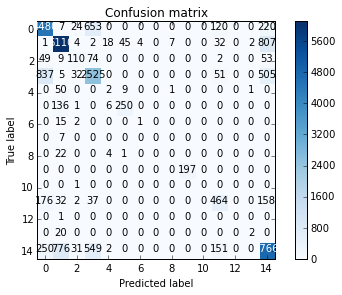

In [16]:
cm1 = confusion_matrix(y_test, rf.predict(X_test))
plot_confusion_matrix(cm1);

# Following is ONLY modeling for Flare/No Flare

In [17]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.20, random_state=42)

In [18]:
rf2 = RandomForestClassifier(n_estimators=2)

In [19]:
rf2.fit_transform(X2_train, y2_train)

/data/vidora/pyvidora/venv/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  0.00000000e+00,   1.00000000e+00,   1.00601514e+09],
       [  6.00000000e+00,   5.00000000e+00,   1.36659342e+09],
       [  2.20000000e+01,   1.50000000e+01,   1.45778298e+09],
       ..., 
       [  4.00000000e+00,   3.00000000e+00,   9.81802140e+08],
       [  0.00000000e+00,   0.00000000e+00,   1.01379048e+09],
       [  1.30000000e+01,   4.20000000e+01,   1.46265048e+09]])

In [20]:
pred2 = rf2.predict(X2_test)

In [21]:
score2 = accuracy_score(y2_test, pred2)
score2

0.88932600056200073

In [22]:
f1 = f1_score(y2_test, pred2)
f1

0.59533245266402468

In [23]:
precision = precision_score(y2_test, pred2)
precision

0.70958712386284117

In [24]:
recall = recall_score(y2_test, pred2)
recall

0.51276864728192162

Confusion matrix, without normalization
[[20126   830]
 [ 1927  2028]]


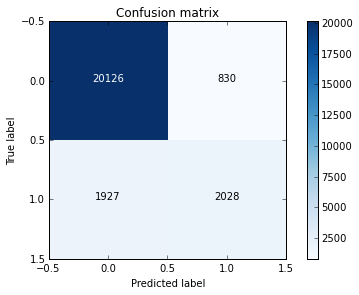

In [25]:
cm1 = confusion_matrix(y2_test, rf2.predict(X2_test))
plot_confusion_matrix(cm1);

# K-means

In [26]:
km = KMeans(n_clusters=2)

In [27]:
pred = km.fit_predict(X2_train)

In [28]:
score = accuracy_score(y2_train, pred)
score

0.44614720700106381

In [29]:
f1 = f1_score(y2_train, pred)
f1

0.20091800240360252

In [30]:
precision = precision_score(y2_train, pred)
precision

0.13125236473704124

In [31]:
recall = recall_score(y2_train, pred)
recall

0.42819231006603714

Confusion matrix, without normalization
[[ 9321 11635]
 [ 2193  1762]]


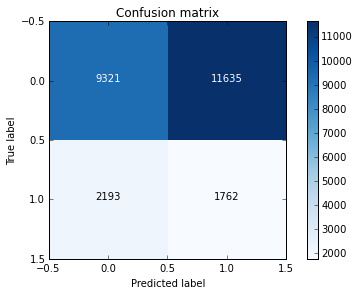

In [32]:
cm1 = confusion_matrix(y2_test, km.predict(X2_test))
plot_confusion_matrix(cm1);

# Support Vector Machines

In [33]:
clf = svm.SVC()

In [34]:
clf.fit(X2_train, y2_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
pred_svm = clf.predict(X2_test)

In [36]:
score = accuracy_score(y2_test, pred_svm)
score

0.84151579623459516

Confusion matrix, without normalization
[[20953     3]
 [ 3945    10]]


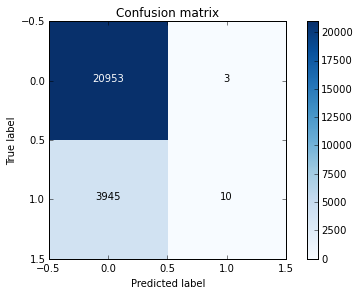

In [38]:
cm1 = confusion_matrix(y2_test, pred_svm)
plot_confusion_matrix(cm1);